In [ ]:
# Başlık: Premier League Maçlarında Ev Sahibi Takım Skor Tahmini
# Amaç: Premier League maçlarında ev sahibi takımın skorunu tahmin etmek için farklı makine öğrenmesi algoritmalarının performansını karşılaştırmaktır.
# Model, yalnızca futbol analitiği ve istatistiksel tahminleme tekniklerinin eğitim amaçlı uygulanması için geliştirilmiştir, maddi ve kötü amaçlar güdülerek oluşturulmamıştır !!

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
df = pd.read_csv('PremierLeagueMatches.csv')

In [79]:
df['Attendance'] = df['Attendance'].str.replace(',', '').str.replace('.', '').astype(float)

In [80]:
selected_columns = ['Home Team', 'Away Team', 'Stadium', 'homeXG', 'awayXG', 'Attendance', 'homeScore']
df = df[selected_columns]

In [81]:
df = df.dropna()
df = pd.get_dummies(df, columns=['Home Team', 'Away Team', 'Stadium'])

In [82]:
X = df.drop('homeScore', axis=1)
y = df['homeScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    })
results_df = pd.DataFrame(results)

In [84]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

([0, 1, 2],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest')])

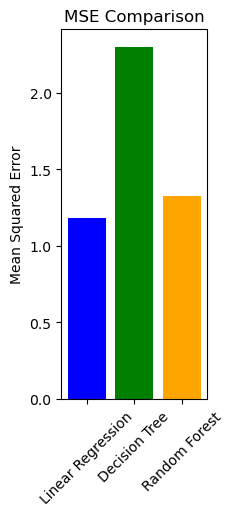

In [85]:
plt.subplot(1, 3, 1)
plt.bar(results_df["Model"], results_df["MSE"], color=['blue', 'green', 'orange'])
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest')])

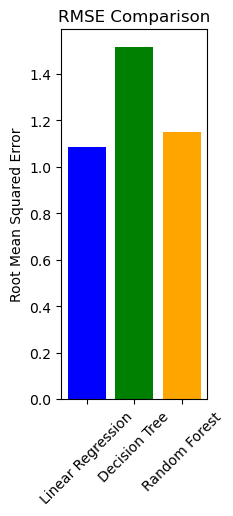

In [86]:
plt.subplot(1, 3, 2)
plt.bar(results_df["Model"], results_df["RMSE"], color=['blue', 'green', 'orange'])
plt.title('RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest')])

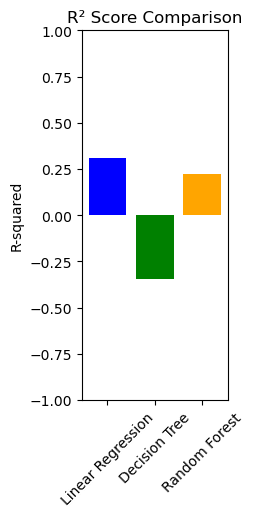

In [111]:
plt.subplot(1, 3, 3)
plt.bar(results_df["Model"], results_df["R²"], color=['blue', 'green', 'orange'])
plt.title('R² Score Comparison')
plt.ylabel('R-squared')
plt.ylim(-1, 1)
plt.xticks(rotation=45)

In [94]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [113]:
# R² Skoru eksi değerlerde olduğu için grafik aralığı -1, 1 olarak yeniden düzenlendi.